In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
df=pd.read_csv("customer_churn_data.csv")

In [15]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1608,2387-KDZQY,Male,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.10,279.5,No
1961,4445-KWOKW,Female,0,No,No,42,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,Yes,Bank transfer (automatic),60.15,2421.6,No
3770,5821-MMEIL,Female,0,Yes,No,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.90,1115.6,No
5632,5567-GZKQY,Male,0,No,No,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.30,1131.5,No
1028,8436-BJUMM,Male,0,Yes,Yes,26,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,2070.6,Yes


In [17]:
df.shape

(7043, 21)

In [19]:
df.drop('customerID',axis='columns',inplace=True)

In [21]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
df.TotalCharges.values #value of this column is stored as a string

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [25]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [27]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] #finding wherver the values are null so that we can drop those values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [29]:
df1=df[df.TotalCharges!=' '] # dropping the empty values i.e that are null

In [31]:
df1.shape

(7032, 20)

In [35]:
# converting the value of that column from string to numeric
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Taimur\AppData\Local\Temp\ipykernel_22688\3221386629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [37]:
df1.TotalCharges.dtypes

dtype('float64')

In [39]:
#Plotting a histogram to check for the people who are leaving the company based on tenure
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

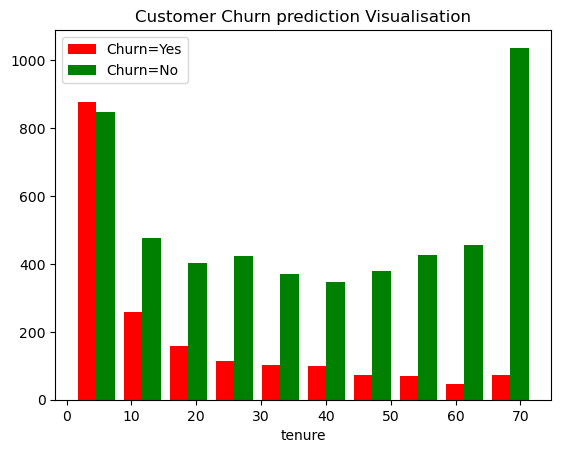

In [41]:
plt.xlabel("tenure")
plt.ylabel=("Number of Customers")
plt.title("Customer Churn prediction Visualisation")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['red','green'], label=['Churn=Yes' , 'Churn=No'])
plt.legend()

In [43]:
#Plotting a histogram to check for the people who are leaving the company based on monthly charges
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

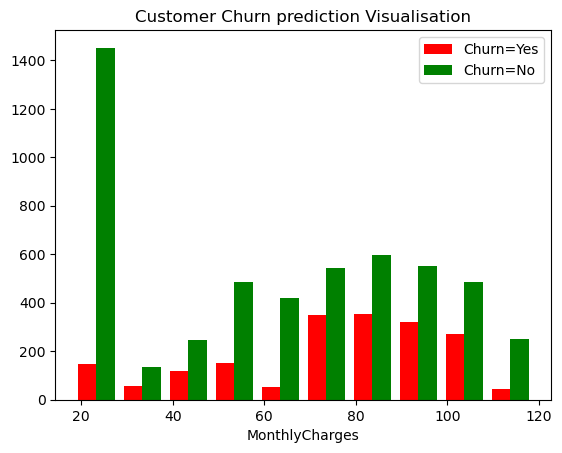

In [45]:
plt.xlabel("MonthlyCharges")
plt.ylabel=("Number of Customers")
plt.title("Customer Churn prediction Visualisation")

plt.hist([mc_churn_yes, mc_churn_no], color=['red','green'], label=['Churn=Yes' , 'Churn=No'])
plt.legend()

In [47]:
# doing label encoding and printing all the unique values in all columns along with the column names where columns are of the datatype = object
def print_unique_cols_values(df):
    for columns in df:
        if df[columns].dtype=='object':
            print(f'{columns} : {df[columns].unique()}')

In [49]:
print_unique_cols_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [51]:
# replacing the 'No Intenet Service' and 'No phone service' to 'No'
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\Taimur\AppData\Local\Temp\ipykernel_22688\1759482731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
C:\Users\Taimur\AppData\Local\Temp\ipykernel_22688\1759482731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [53]:
print_unique_cols_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [55]:
# replacing 'Yes'  and 'No' with 0 and 1 
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [57]:
for col in yes_no_cols:
    df1[col].replace({'Yes':1 , 'No':0}, inplace= True)

C:\Users\Taimur\AppData\Local\Temp\ipykernel_22688\861227443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1 , 'No':0}, inplace= True)


In [59]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [61]:
df1['gender'].replace({'Female':1 , 'Male':0}, inplace=True)

C:\Users\Taimur\AppData\Local\Temp\ipykernel_22688\1764028196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1 , 'Male':0}, inplace=True)


In [63]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [65]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)

In [67]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [71]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
504,0,0,0,1,69,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1612,0,0,1,1,67,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
439,0,0,0,0,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1269,0,0,1,1,62,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [73]:
# we will now scale tenure, monthlycharges, totalcharges as all other columns in range of 0 to 1 
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [75]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4947,0,0,0,0,0.352113,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4297,1,0,0,0,0.619718,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,1
4151,1,1,0,0,0.788732,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
1095,0,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [77]:
# defining the X and Y variables for train_test_split
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=5)

In [81]:
X_train.shape

(5625, 26)

In [83]:
X_test.shape

(1407, 26)

In [85]:
# compiling the neural network
import tensorflow as tf
from tensorflow import keras
model= keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 4s 4ms/step - loss: 0.5346 - accuracy: 0.7292
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4344 - accuracy: 0.7945
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4221 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4144 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4127 - accuracy: 0.8039
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4113 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4099 - accuracy: 0.8062
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8080
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4081 - accura

In [87]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 4ms/step - loss: 0.4566 - accuracy: 0.7797


[0.4565735459327698, 0.7796730399131775]

In [89]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [91]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 4ms/step


array([[0.43295783],
       [0.47999305],
       [0.01280412],
       [0.7777557 ],
       [0.3694519 ]], dtype=float32)

In [93]:
#converting the predicted value to a range of 0 and 1 for better comaparison
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [95]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [97]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 1]

In [99]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.56      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



TypeError: 'str' object is not callable

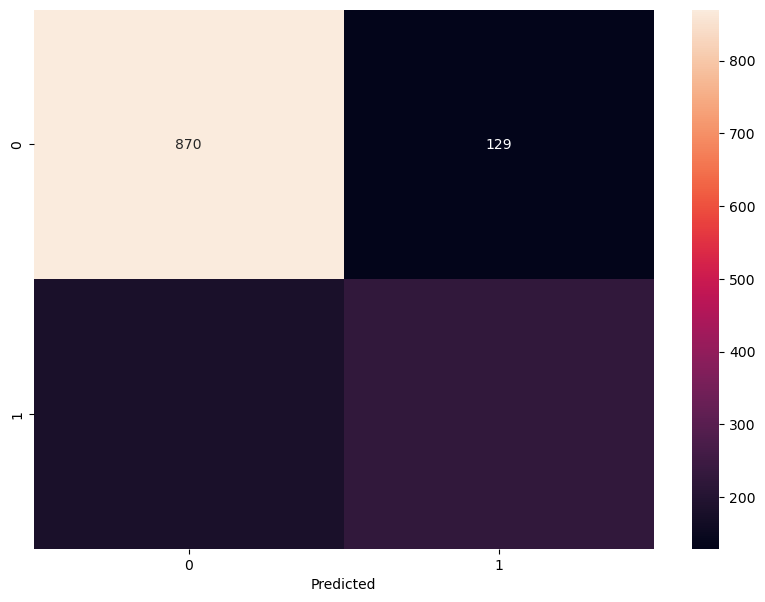

In [101]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
from tensorflow_addons import losses

C:\Users\Taimur\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [105]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [107]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [109]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 4s 4ms/step - loss: 0.5171 - accuracy: 0.7100
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4266 - accuracy: 0.7936
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4195 - accuracy: 0.7996
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.8030
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4136 - accuracy: 0.8048
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4107 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4096 - accuracy: 0.8046
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4079 - accuracy: 0.8044
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4076 - accuracy: 0.8068
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4059 - accura

In [111]:
count_class_0, count_class_1 = df.Churn.value_counts() # class count

In [113]:
# dividing by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [115]:
df_class_0.shape

(5163, 27)

In [117]:
df_class_1.shape

(1869, 27)

In [119]:
# METHOD 1 :- UNDERSAMPLING THE MAJORITY CLASS
df_class_0_under=df_class_0.sample(count_class_1)

#CREATING A NEW DATAFRAME OF BALANCED SAMPLES
df_test_under=pd.concat([df_class_0_under,df_class_1], axis=0)

In [121]:
df_test_under.shape

(3738, 27)

In [123]:
X=df_test_under.drop('Churn', axis='columns')
y=df_test_under['Churn']

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y) 
#startify=y means we will have balanced samples meaning X-train,X_test will have balanced samples of 0 and 1 class

In [127]:
y_train.value_counts() # equal number of samples of 0 and 1

Churn
0    1495
1    1495
Name: count, dtype: int64

In [129]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1) # training the model on balanced samples and checking the improved f1-score

Epoch 1/100
94/94 [==============================] - 4s 4ms/step - loss: 0.6230 - accuracy: 0.6572
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.7569
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4954 - accuracy: 0.7649
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7722
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4846 - accuracy: 0.7702
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.7729
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.7726
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4799 - accuracy: 0.7766
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4751 - accuracy: 0.7759
Epoch 11/

In [131]:
count_class_0,count_class_1

(5174, 1869)

In [133]:
# METHOD 2:- OVERSAMPLING THE MINORITY CLASS
df_class_1_over=df_class_1.sample(count_class_0, replace=True)
df_test_over=pd.concat([df_class_1_over,df_class_0],axis=0)

In [135]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [139]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 4s 4ms/step - loss: 0.5567 - accuracy: 0.7105
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4934 - accuracy: 0.7581
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4840 - accuracy: 0.7620
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4786 - accuracy: 0.7641
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.7714
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4697 - accuracy: 0.7716
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4671 - accuracy: 0.7706
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4634 - accuracy: 0.7772
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4611 - accuracy: 0.7786
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4579 - accura